# Домашняя работа

Вам дан датасет с данными о маркетинговой компании.

## Easy (+0.1)

Посчитать:

Количество жалоб
Средний возраст покупателей. Покупатель - тот, кто совершал хотя бы одну покупку за последние два года (колонки Mnt*). Отличается ли он от среднего возраста всех людей в датасете?

In [1]:
import pandas as pd
df = pd.read_csv('../data/marketing_campaign.csv')

In [2]:
complains = df['Complain'].sum() 
print(f"Количество жалоб: {complains}")

Количество жалоб: 21


In [3]:
current_year = 2024
df['Age'] = current_year - df['Year_Birth']
mid_age = df['Age'].mean()
mnt_columns = df.filter(regex='Mnt', axis=1) # колонки, начинающиеся с Mnt
customers = df[(mnt_columns != 0).any(axis=1)]
mid_age_of_customers = customers['Age'].mean()
print(f"Средний возраст всех людей в датасете: {mid_age}\nСредний возраст покупателей: {mid_age_of_customers}")
if mid_age_of_customers == mid_age:
    print("Средний возраст всех людей в датасете совпадает со средним возрастом покупателей")
else:
    print("Средний возраст всех людей в датасете НЕ совпадает со средним возрастом покупателей")

Средний возраст всех людей в датасете: 55.19419642857143
Средний возраст покупателей: 55.19419642857143
Средний возраст всех людей в датасете совпадает со средним возрастом покупателей


## Medium (+0.4)

Постройте графики и визуально оцените, есть ли зависимости между колонками:

- Education
- Marital_Status
- Income
- Kidhome
- Teenhome
- Recency
- NumWebPurchases
- NumStorePurchases
- возраст

Кратко напишите выводы.

In [4]:
import matplotlib.pyplot as plt

In [5]:
dictionary = {
    'Education': 'Образование',
    'Marital_Status': 'Семейное положение',
    'Income': 'Годовой доход семьи клиента',
    'Kidhome': 'Количество маленьких детей в семье клиента',
    'Teenhome': 'Количество подростков в семье клиента',
    'Recency': 'Количество дней с момента последней покупки',
    'NumWebPurchases': 'Количество покупок через веб-сайт',
    'NumStorePurchases': 'Количество покупок в магазине',
    'Age': 'Возраст'
}


In [6]:
def scatter_plot(par1, par2):
    fig, ax = plt.subplots()
    ax.scatter(df[par1], df[par2])
    ax.set_xlabel(dictionary[par1])
    ax.set_ylabel(dictionary[par2])
    ax.set_title(f"{dictionary[par1]} и {dictionary[par2]}")

    plt.show()

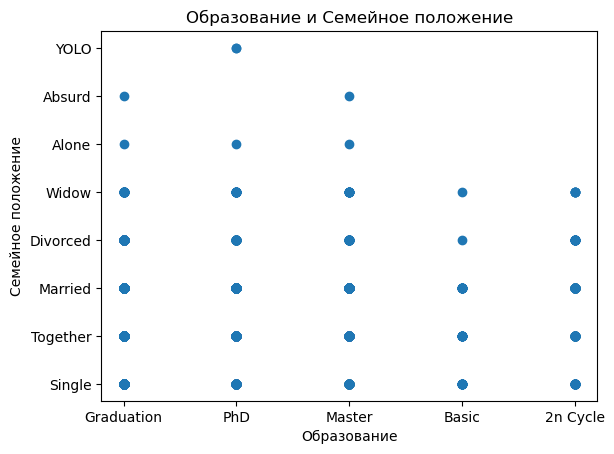

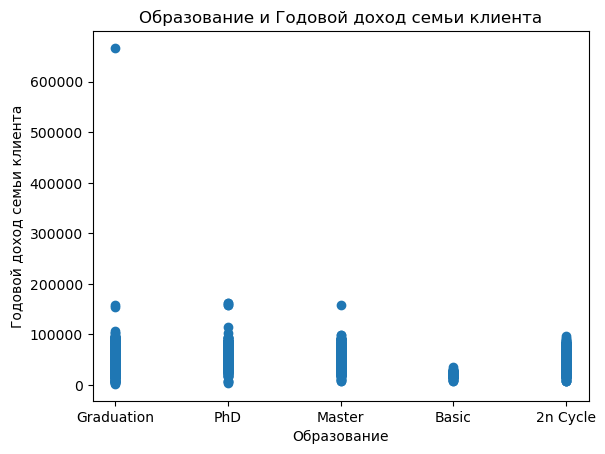

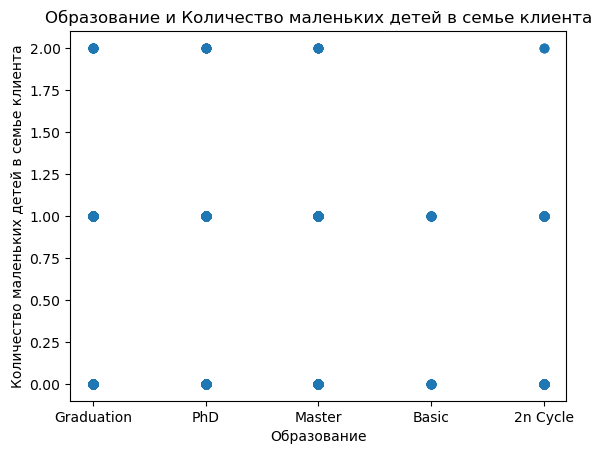

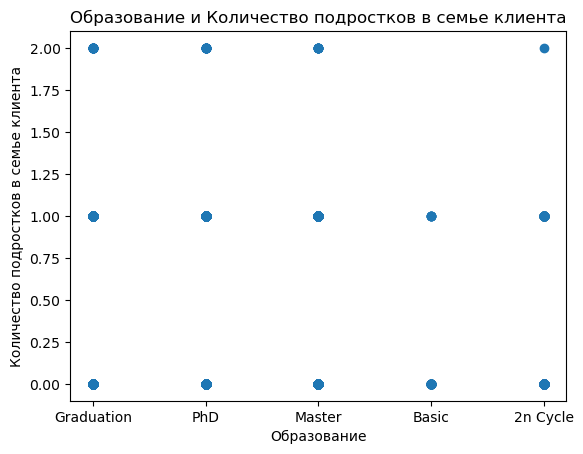

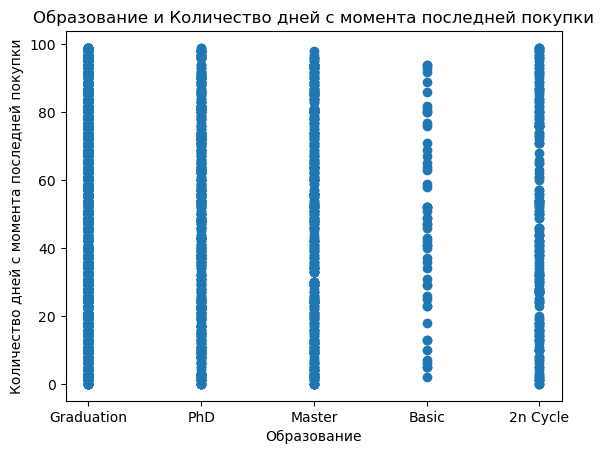

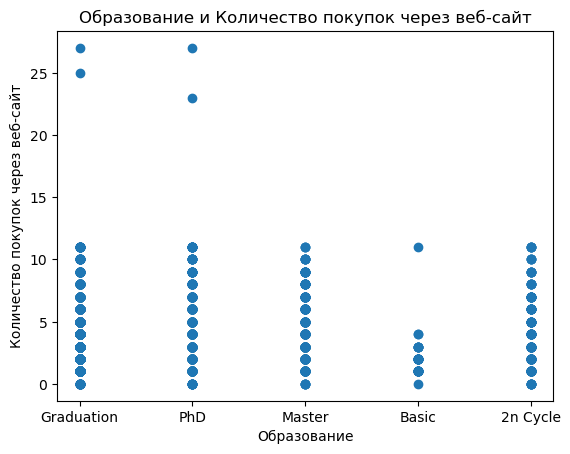

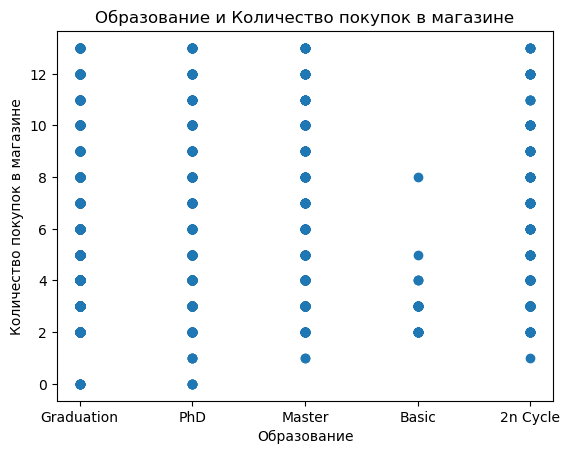

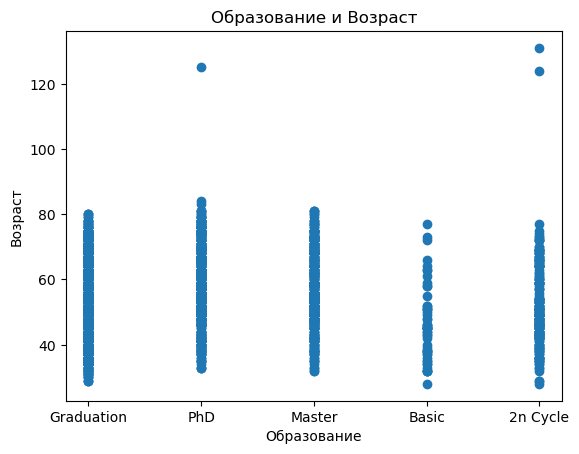

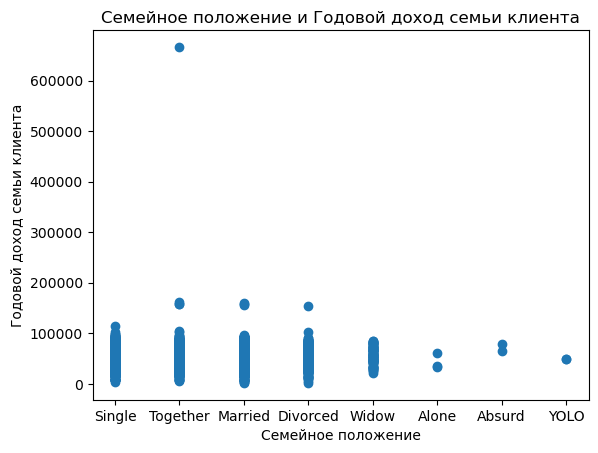

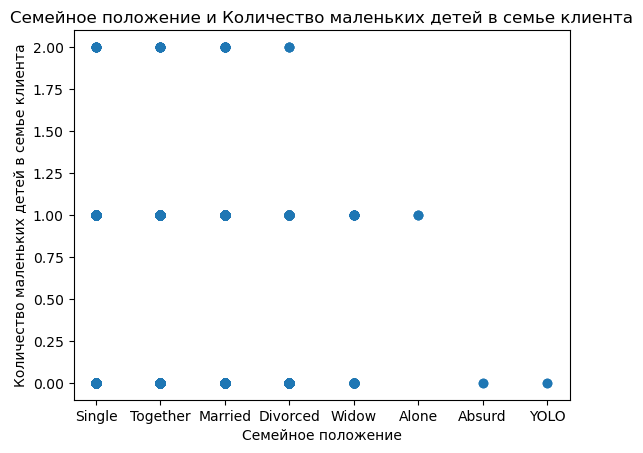

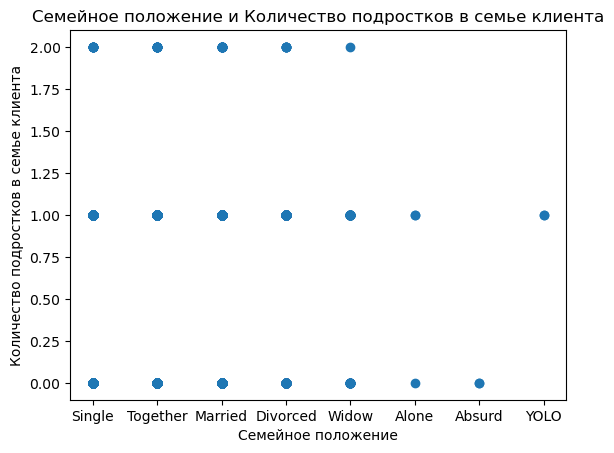

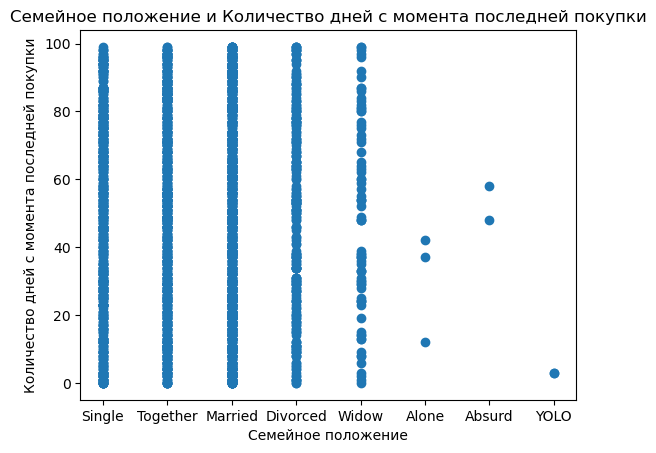

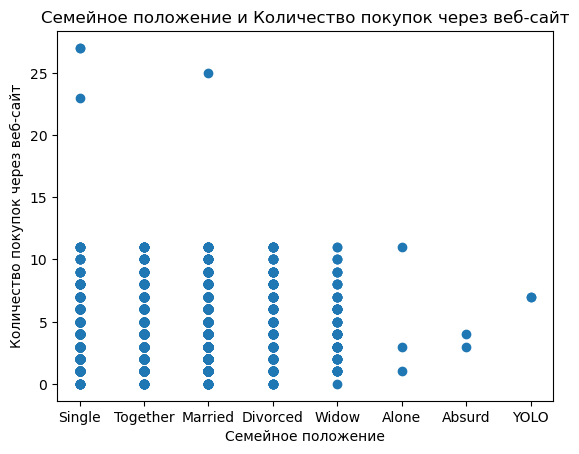

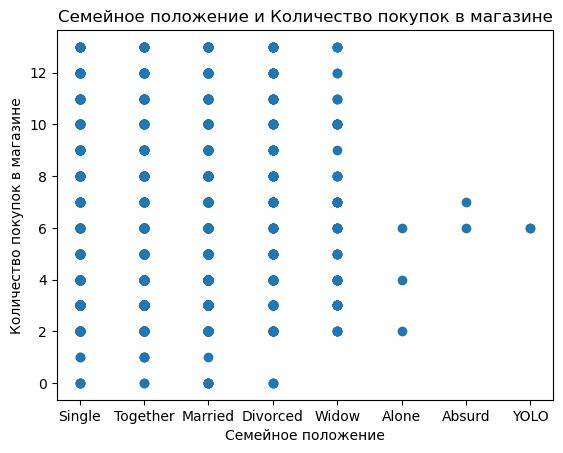

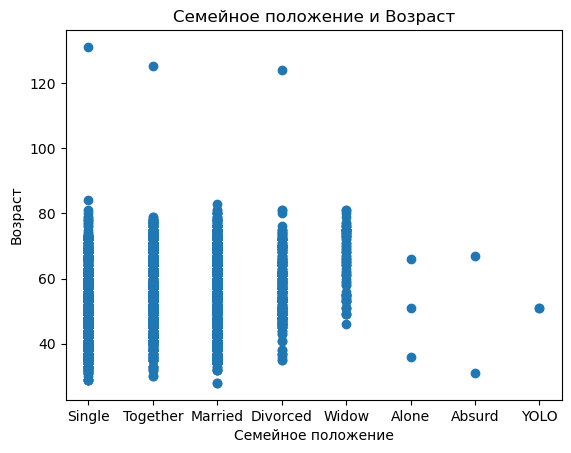

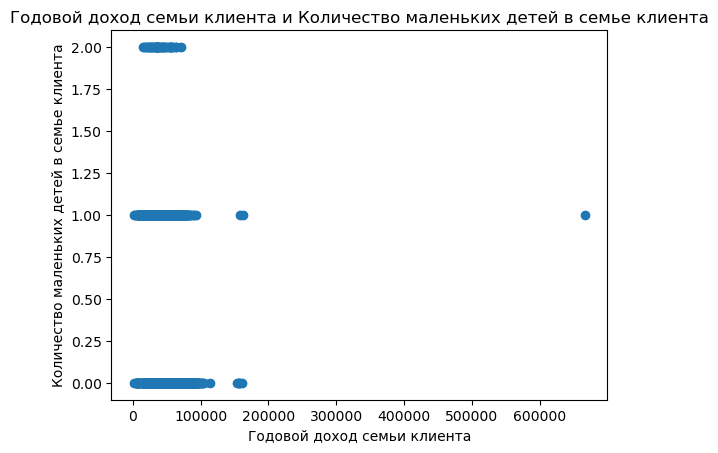

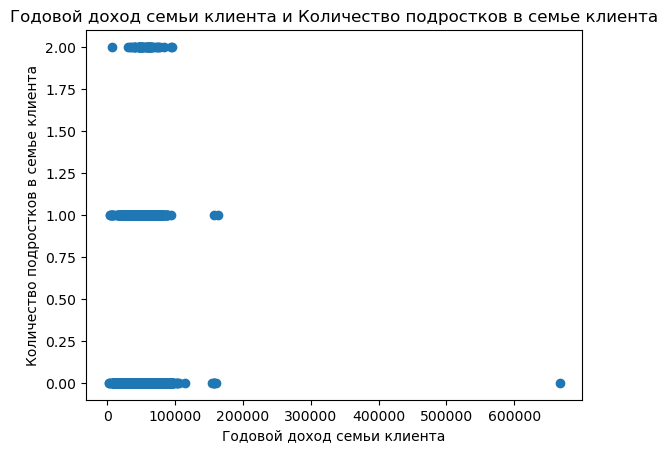

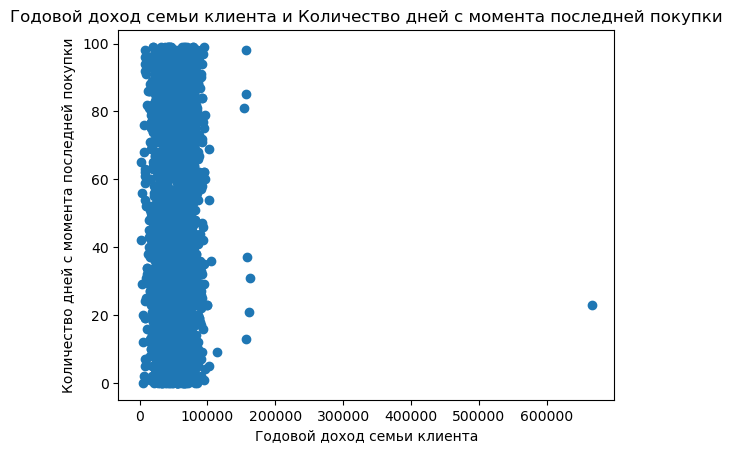

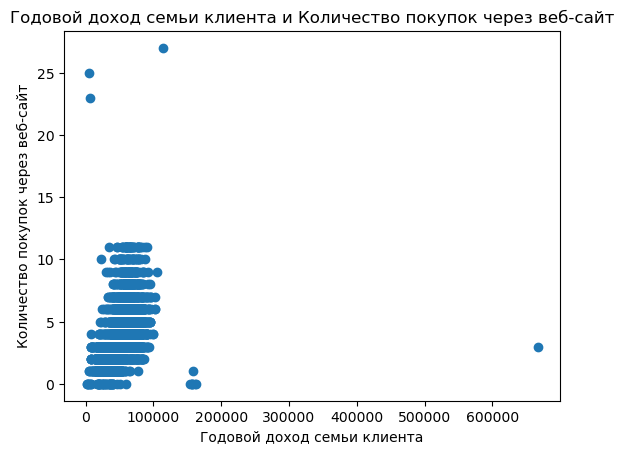

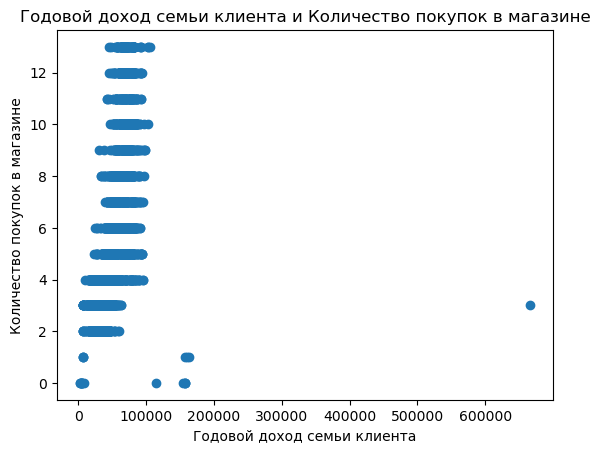

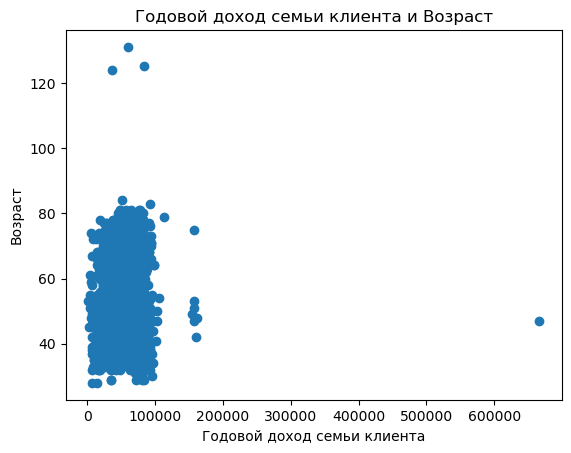

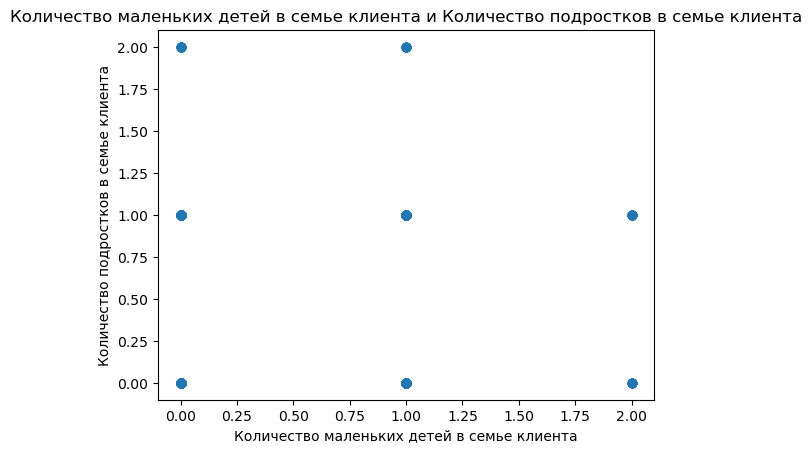

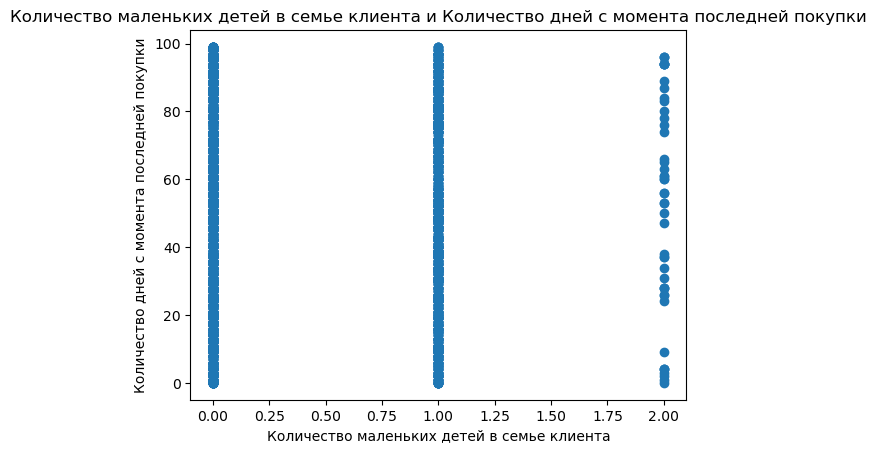

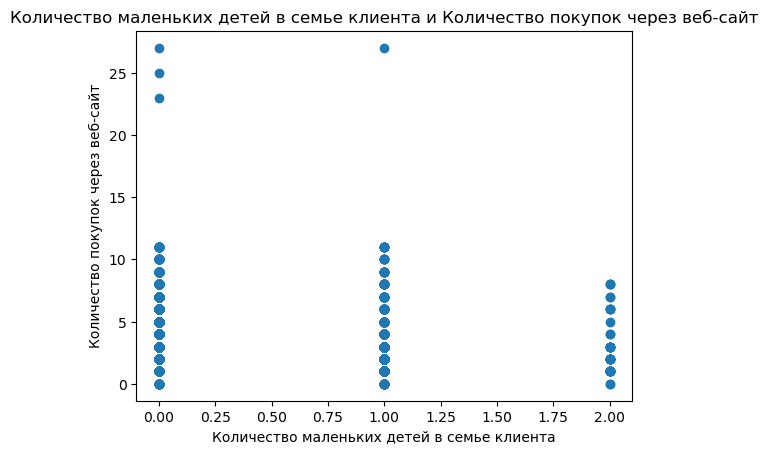

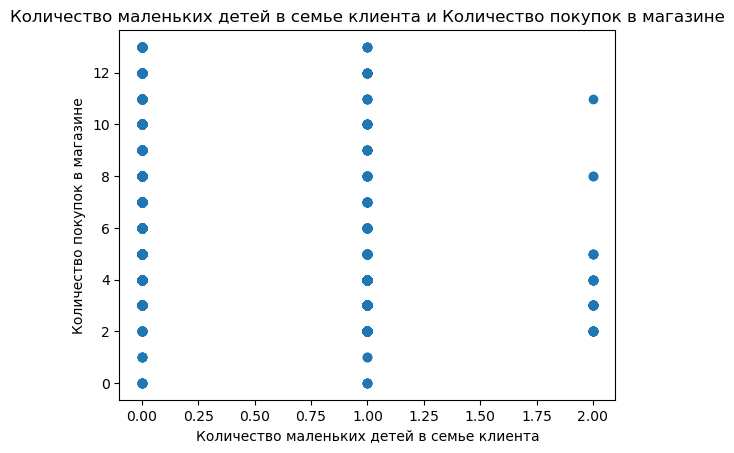

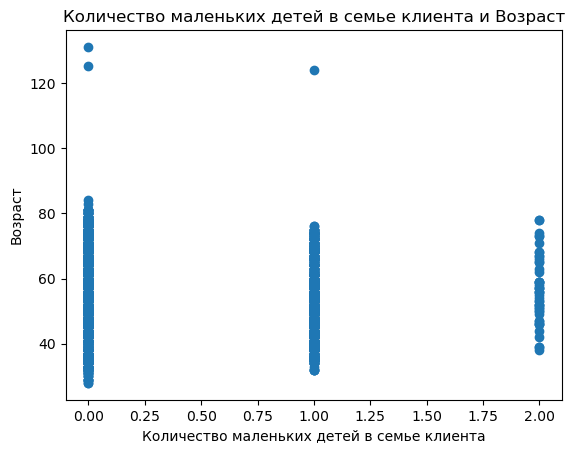

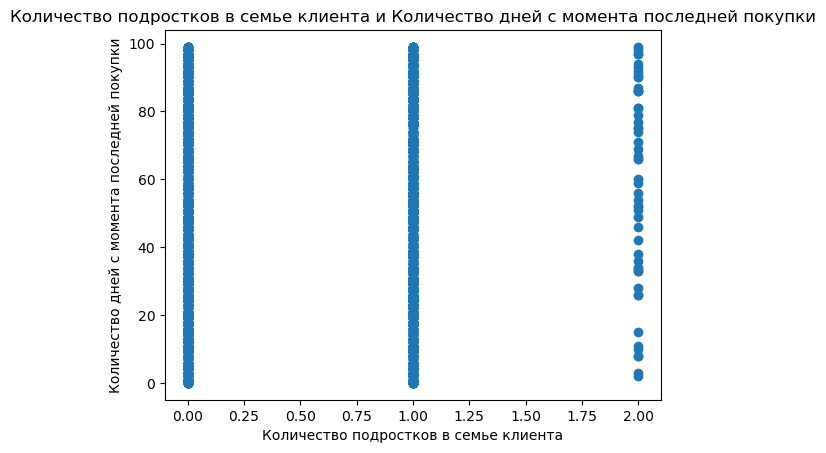

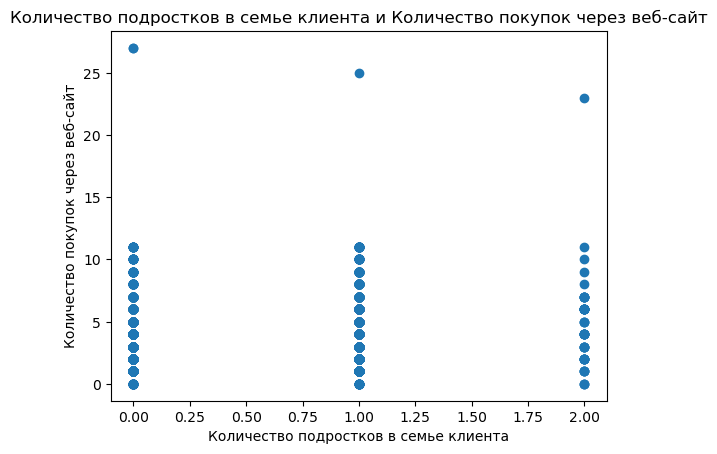

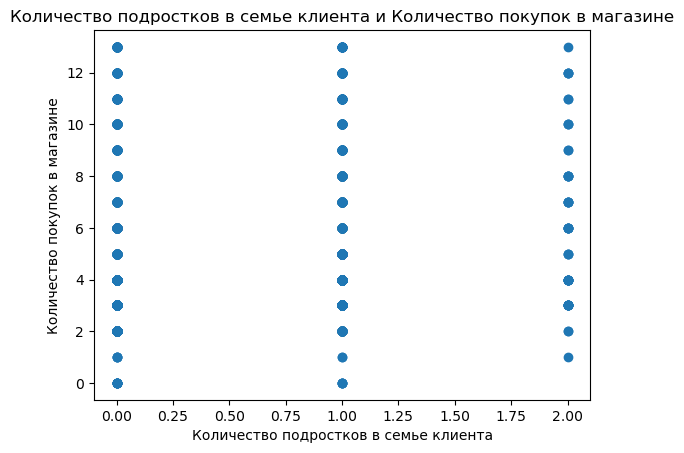

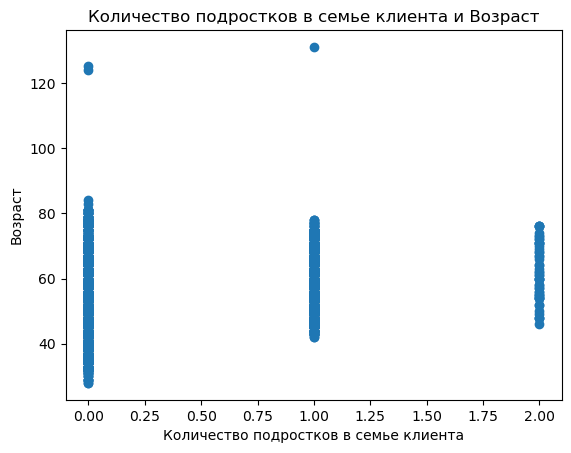

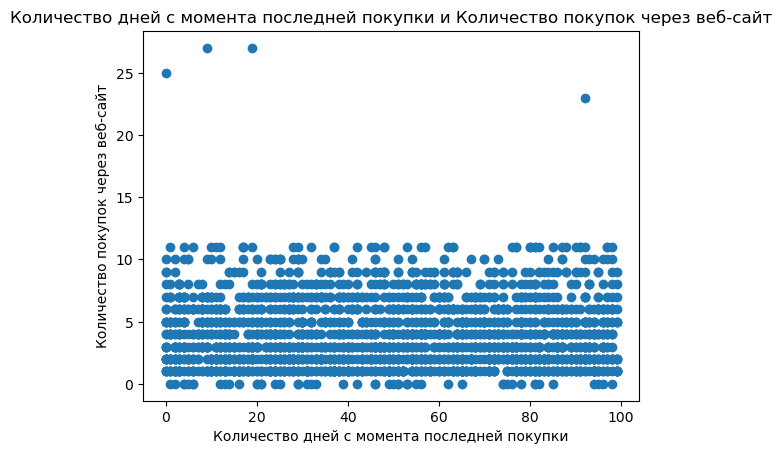

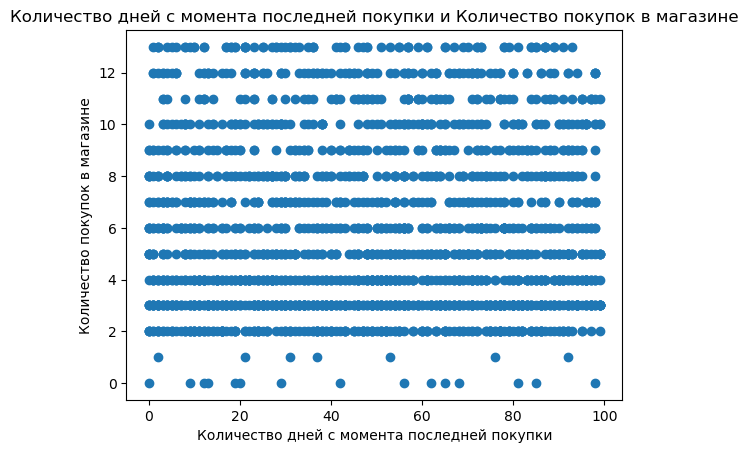

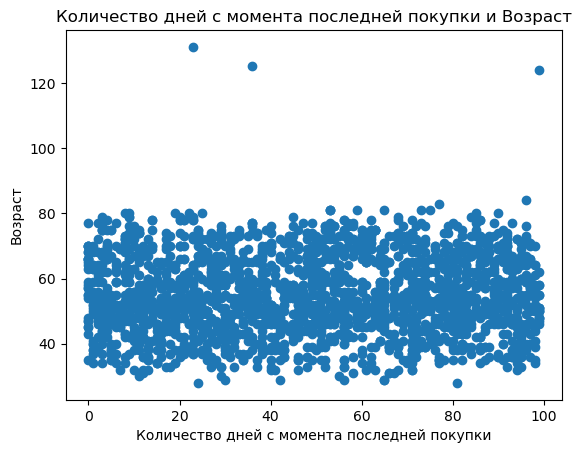

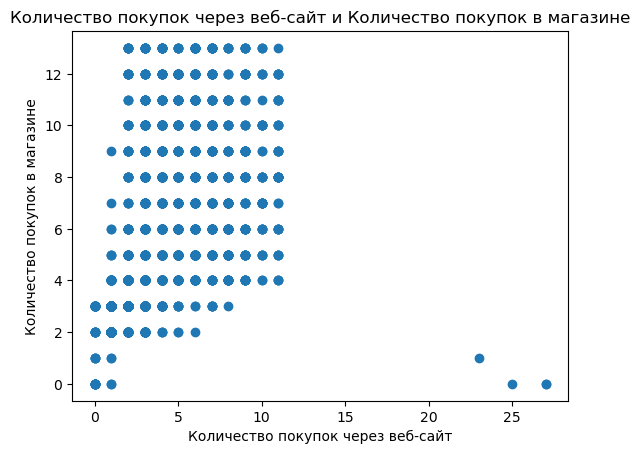

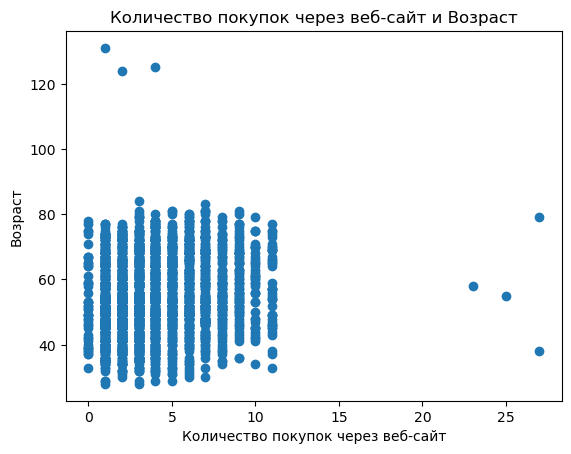

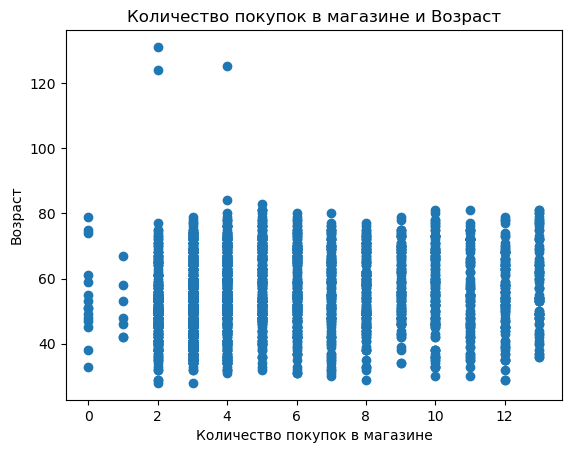

In [7]:
keys = list(dictionary.keys())
for i in range(len(keys)):
    for j in range(i+1, len(keys)):
        scatter_plot(keys[i], keys[j])

### Выводы


- В среднем у людей, закончивших хотя бы бакалавриат, годовой доход семьи больше, чем у людей с основным образованием
- Семейное положение не особо связано с количеством детей в семье и возрастом клиента
- Люди разного возраста примерно одинаково покупают что-то через веб-сайт
- В среднем чем больше доход, тем больше покупок
- Есть люди, которые не покупали ничего ни через веб-сайт, ни в магазине; также есть те, кто ничего не покупал через веб-сайт, но при этом их количество покупок в магазине очень мало; и есть те, кто не покупал ничего в магазине, но приобретал онлайн